In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [53]:
#pip install scikit-learn

In [54]:
df = pd.read_csv(r'D:\Machine Learning\Linear Regression\Datasets\Real_Estate.csv')
df.head()

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,2012-09-02 16:42:30.519336,13.3,4082.0150,8,25.007059,121.561694,6.488673
1,2012-09-04 22:52:29.919544,35.5,274.0144,2,25.012148,121.546990,24.970725
2,2012-09-05 01:10:52.349449,1.1,1978.6710,10,25.003850,121.528336,26.694267
3,2012-09-05 13:26:01.189083,22.2,1055.0670,5,24.962887,121.482178,38.091638
4,2012-09-06 08:29:47.910523,8.5,967.4000,6,25.011037,121.479946,21.654710


In [55]:
df.shape

(414, 7)

In [56]:
df.columns

Index(['Transaction date', 'House age', 'Distance to the nearest MRT station',
       'Number of convenience stores', 'Latitude', 'Longitude',
       'House price of unit area'],
      dtype='object')

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Transaction date                     414 non-null    object 
 1   House age                            414 non-null    float64
 2   Distance to the nearest MRT station  414 non-null    float64
 3   Number of convenience stores         414 non-null    int64  
 4   Latitude                             414 non-null    float64
 5   Longitude                            414 non-null    float64
 6   House price of unit area             414 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 22.8+ KB


### **Dat Cleaning**

In [58]:
df.isnull().sum()

Transaction date                       0
House age                              0
Distance to the nearest MRT station    0
Number of convenience stores           0
Latitude                               0
Longitude                              0
House price of unit area               0
dtype: int64

In [59]:
df.duplicated().sum()

np.int64(0)

In [60]:
df['Year'] = pd.DatetimeIndex(df['Transaction date']).year
df.head()

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area,Year
0,2012-09-02 16:42:30.519336,13.3,4082.0150,8,25.007059,121.561694,6.488673,2012
1,2012-09-04 22:52:29.919544,35.5,274.0144,2,25.012148,121.546990,24.970725,2012
2,2012-09-05 01:10:52.349449,1.1,1978.6710,10,25.003850,121.528336,26.694267,2012
3,2012-09-05 13:26:01.189083,22.2,1055.0670,5,24.962887,121.482178,38.091638,2012
4,2012-09-06 08:29:47.910523,8.5,967.4000,6,25.011037,121.479946,21.654710,2012


In [61]:
num = df.drop(columns=['Transaction date', 'Latitude','Longitude'],axis=1)
num

,House age,Distance to the nearest MRT station,Number of convenience stores,House price of unit area,Year
0,13.3,4082.01500,8,6.488673,2012
1,35.5,274.01440,2,24.970725,2012
2,1.1,1978.67100,10,26.694267,2012
3,22.2,1055.06700,5,38.091638,2012
4,8.5,967.40000,6,21.654710,2012
...,...,...,...,...,...
409,18.3,170.12890,6,29.096310,2013
410,11.9,323.69120,2,33.871347,2013
411,0.0,451.64190,8,25.255105,2013
412,35.9,292.99780,5,25.285620,2013


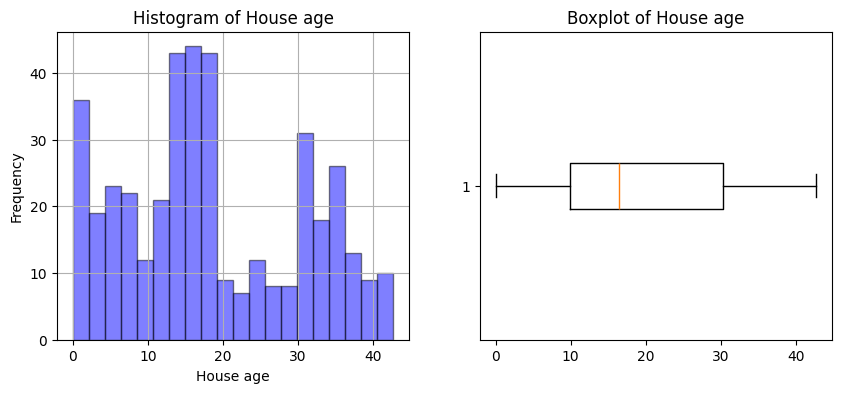

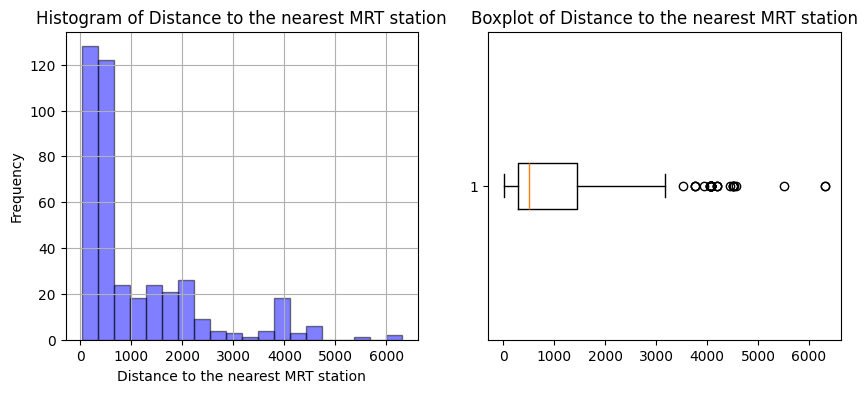

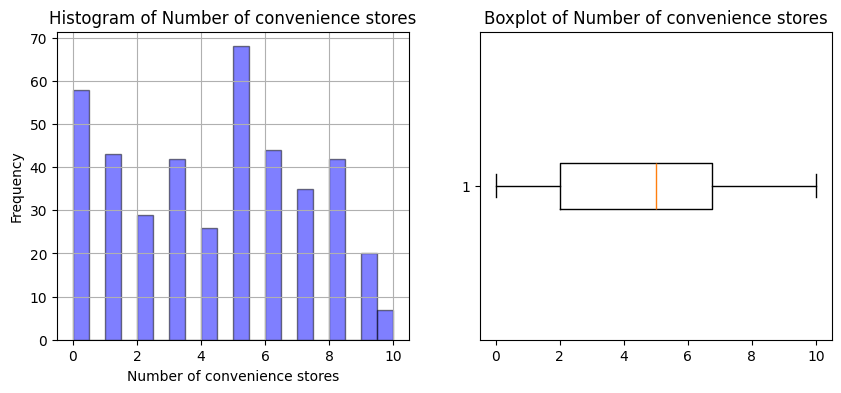

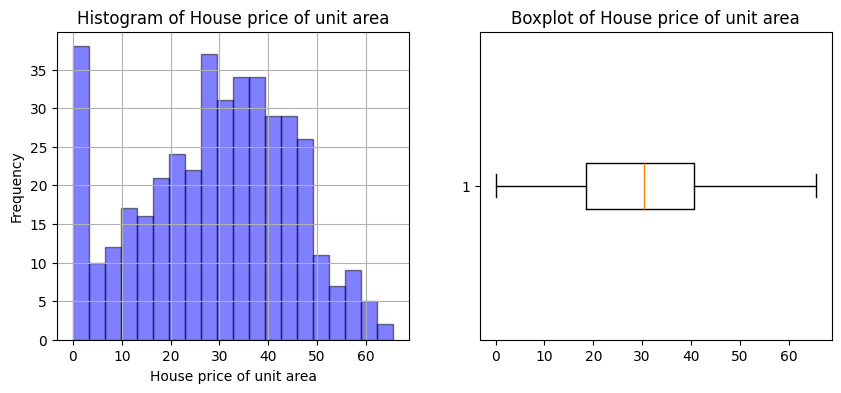

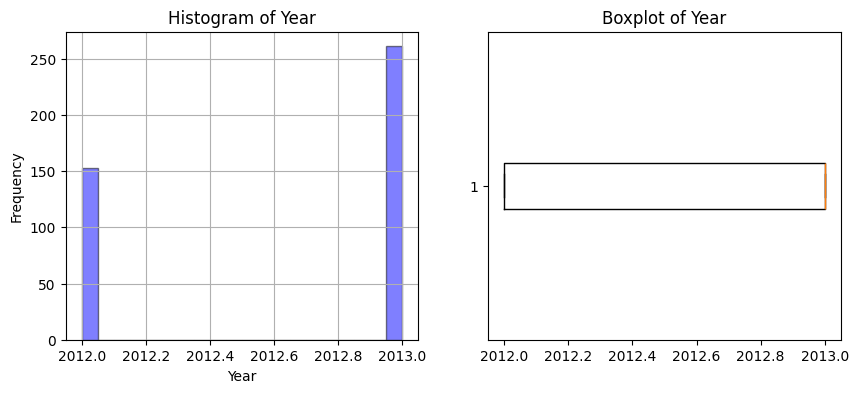

In [62]:
for i in num.columns:
    plt.figure(figsize=(10,4))

    plt.subplot(1, 2, 1)
    df[i].hist(bins=20, alpha=0.5, color='b',edgecolor='black')
    plt.title(f'Histogram of {i}')
    plt.xlabel(i)
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    plt.boxplot(df[i], vert=False)
    plt.title(f'Boxplot of {i}')

    plt.show()

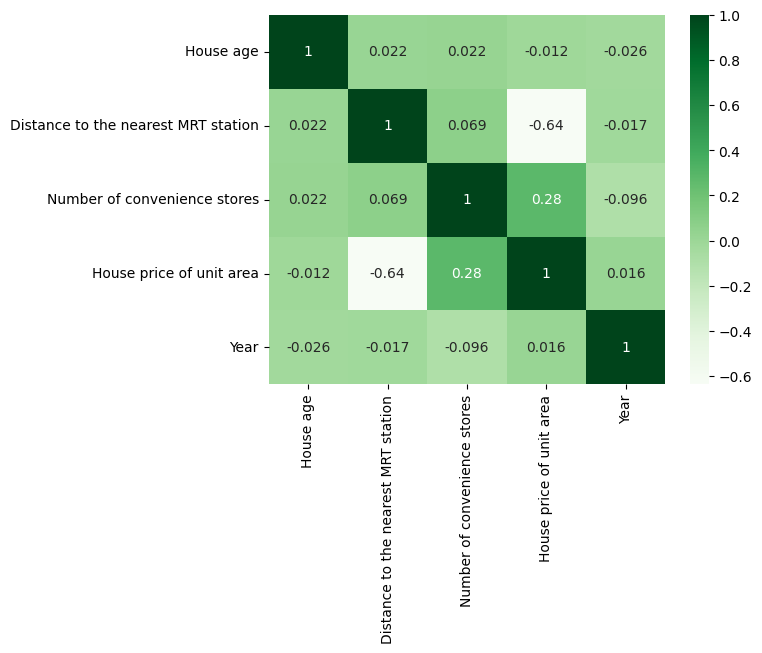

In [63]:
import matplotlib.pyplot as plt
corr = num.corr(method='pearson')
sns.heatmap(corr, annot=True, cmap='Greens')
plt.show()

### **Model Building**

In [64]:
df.columns

Index(['Transaction date', 'House age', 'Distance to the nearest MRT station',
       'Number of convenience stores', 'Latitude', 'Longitude',
       'House price of unit area', 'Year'],
      dtype='object')

In [65]:
x = df[['Distance to the nearest MRT station']]
y = df[['House price of unit area']]

In [66]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [67]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [68]:
X_test

,Distance to the nearest MRT station
358,431.1114
350,1360.1390
373,250.6310
399,208.3905
369,1414.8370
...,...
31,1828.3190
283,815.9314
157,3171.3290
203,4197.3490


In [69]:
y_pred = model.predict(X_test)
y_pred

array([[33.78462636],
       [26.40030431],
       [35.21916436],
       [35.55491052],
       [25.96554043],
       [33.54625099],
       [25.68825903],
       [35.55491052],
       [35.78491221],
       [ 7.2306015 ],
       [34.9923031 ],
       [29.54303405],
       [19.5926783 ],
       [33.91310338],
       [35.72109814],
       [34.8824143 ],
       [36.49230559],
       [31.50197449],
       [33.37411556],
       [33.1373267 ],
       [33.37411556],
       [34.63873733],
       [33.52144072],
       [33.37411556],
       [20.14299664],
       [32.43538627],
       [15.94951784],
       [23.59853413],
       [34.16480749],
       [27.38253304],
       [35.85424408],
       [35.96939237],
       [35.67259516],
       [34.91160893],
       [34.91160893],
       [33.68112174],
       [17.58146017],
       [35.85903064],
       [34.10688004],
       [34.10369113],
       [32.12730942],
       [36.37821333],
       [ 4.76563065],
       [ 4.76563065],
       [35.73741391],
       [33

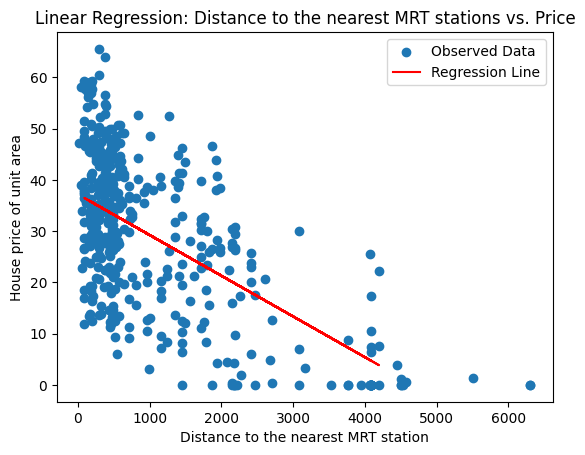

In [70]:
# Scatter plot of the data points
plt.scatter(df['Distance to the nearest MRT station'], df['House price of unit area'], label='Observed Data')

# Plot the regression line
plt.plot(X_test['Distance to the nearest MRT station'], y_pred, color='red', label='Regression Line')

# Set labels and title
plt.xlabel('Distance to the nearest MRT station')
plt.ylabel('House price of unit area')
plt.title('Linear Regression: Distance to the nearest MRT stations vs. Price')

# Display legend
plt.legend()

# Show the plot
plt.show()

In [71]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred) # Cost function
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred) # cost function

# Print the evaluation metrics
print("Evaluation Metrics:")

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")

Evaluation Metrics:
Mean Squared Error (MSE): 148.27
Mean Absolute Error (MAE): 10.1545
R-squared (R²): 0.4640


In [72]:
# New Data
new_data = [4000]
prediction = model.predict([new_data])
print(f"Predicted value: {prediction[0]}")

Predicted value: [5.41752213]


c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [73]:
import statsmodels.api as sm

In [74]:
X = sm.add_constant(x)
X

,const,Distance to the nearest MRT station
0,1.0,4082.01500
1,1.0,274.01440
2,1.0,1978.67100
3,1.0,1055.06700
4,1.0,967.40000
...,...,...
409,1.0,170.12890
410,1.0,323.69120
411,1.0,451.64190
412,1.0,292.99780


In [75]:
# Fit the linear regression model
model = sm.OLS(y,X).fit()

In [76]:
# Print the summary
print(model.summary())

                               OLS Regression Results                               
Dep. Variable:     House price of unit area   R-squared:                       0.405
Model:                                  OLS   Adj. R-squared:                  0.404
Method:                       Least Squares   F-statistic:                     280.7
Date:                      Wed, 12 Feb 2025   Prob (F-statistic):           2.01e-48
Time:                              15:54:06   Log-Likelihood:                -1620.7
No. Observations:                       414   AIC:                             3245.
Df Residuals:                           412   BIC:                             3254.
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------

In [77]:
y_pred = model.predict(X)
y_pred

0       3.820248
1      35.724805
2      21.442687
3      29.180915
4      29.915415
         ...    
409    36.595188
410    35.308598
411    34.236589
412    35.565756
413    37.262711
Length: 414, dtype: float64

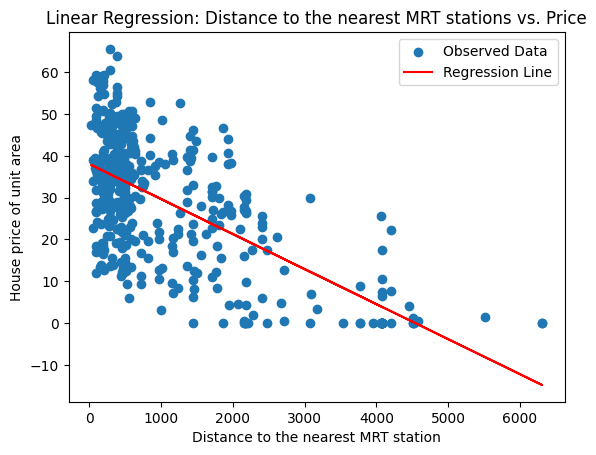

In [78]:
# Scatter plot of the data points
plt.scatter(df['Distance to the nearest MRT station'], df['House price of unit area'], label='Observed Data')

# Plot the regression line
plt.plot(df['Distance to the nearest MRT station'], y_pred, color='red', label='Regression Line')

# Set labels and title
plt.xlabel('Distance to the nearest MRT station')
plt.ylabel('House price of unit area')
plt.title('Linear Regression: Distance to the nearest MRT stations vs. Price')

# Display legend
plt.legend()

# Show the plot
plt.show()

In [79]:
df['Distance to the nearest MRT station'].max()

np.float64(6306.153)

In [80]:
new_data = [1, 4000]
prediction = model.predict([new_data])
print(f"Predicted value: {prediction[0]}")

Predicted value: 4.507394251926804
